In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
import numpy as np
import pandas as pd



In [82]:
data=pd.read_csv("/content/drive/MyDrive/Data_Science/Ml-Dl_projects/spam-ham-classification/spam.csv",encoding='ISO-8859-1')

In [83]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
709,spam,4mths half price Orange line rental & latest c...,NaN,NaN,NaN
4485,ham,have * good weekend.,NaN,NaN,NaN
707,ham,Quite late lar... Ard 12 anyway i wun b drivin...,NaN,NaN,NaN
5406,ham,Dear are you angry i was busy dear,NaN,NaN,NaN
409,ham,Message:some text missing* Sender:Name Missing...,NaN,NaN,NaN


**1.Cleaning data**

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [85]:
# drop column: Unnamed: 2 ,Unnamed: 3 ,Unnamed: 4 as these are useless.
#data.drop(columns=['Unnamed: 2' ,'Unnamed: 3' ,'Unnamed: 4'],inplace=True)
data=data[['v2','v1']]


In [86]:
# finding numbers of null values.
data.isnull().sum()

v2    0
v1    0
dtype: int64

In [87]:
data.shape

(5572, 2)

In [88]:
data.duplicated().sum()

403

In [89]:
data.drop_duplicates(keep='first',inplace=True)

**2.EDA**

In [90]:
# data visualization
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Percentage of ham and spam data')

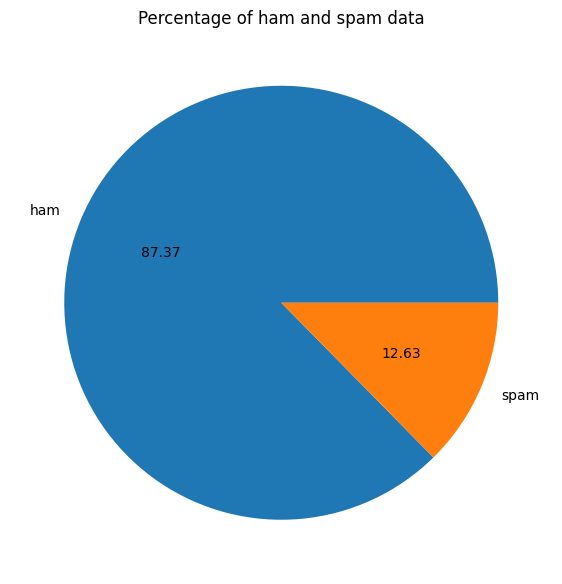

In [91]:
fig=plt.figure(figsize=(7,8))
plt.pie(data['v1'].value_counts(),autopct='%.2f',labels=['ham','spam'])
plt.title("Percentage of ham and spam data")

In [92]:
# renaming columns v1 and v2
data.rename(columns={'v1':'target','v2':'message'},inplace=True)

In [93]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [94]:
data['target']=encoder.fit_transform(data['target'])

In [95]:
import nltk

In [96]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [97]:
# number of character
data["num_char"]=data["message"].apply(len)

In [98]:
# number of words
data["num_words"]=data.message.apply(lambda x:len(nltk.word_tokenize(x)))

In [99]:
# number of sentence
data['num_sentence']=data.message.apply(lambda x: len(nltk.sent_tokenize(x)))

In [100]:
data[['num_char' ,	'num_words'	,'num_sentence']].describe()

,num_char,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [101]:
# ham
data[data['target']==0][['num_char' ,	'num_words'	,'num_sentence']].describe()

,num_char,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [102]:
# spam
data[data['target']==1][['num_char' ,	'num_words'	,'num_sentence']].describe()

,num_char,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [103]:
import seaborn as sns

Text(0.5, 1.0, 'Comparison between spam and ham message on basis of number of charactors')

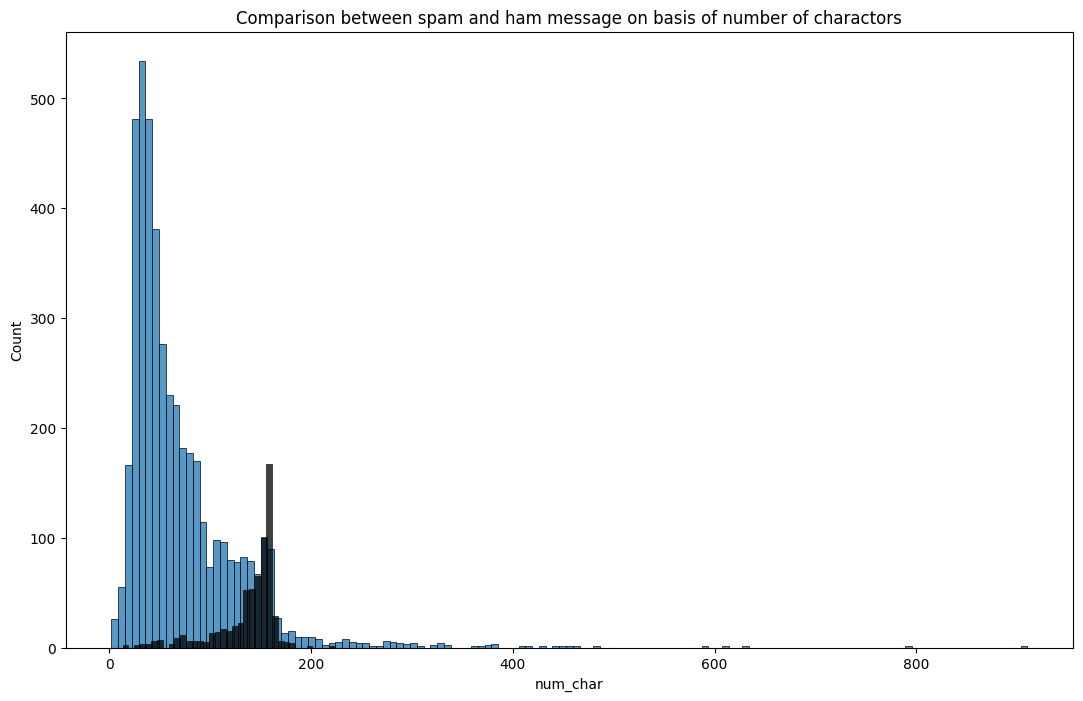

In [104]:
plt.figure(figsize=(13,8))
sns.histplot(data[data['target']==0]['num_char'])
sns.histplot(data[data['target']==1]['num_char'],color='black')
plt.title("Comparison between spam and ham message on basis of number of charactors")

Text(0.5, 1.0, 'Comparison between spam and ham message on basis of number of words')

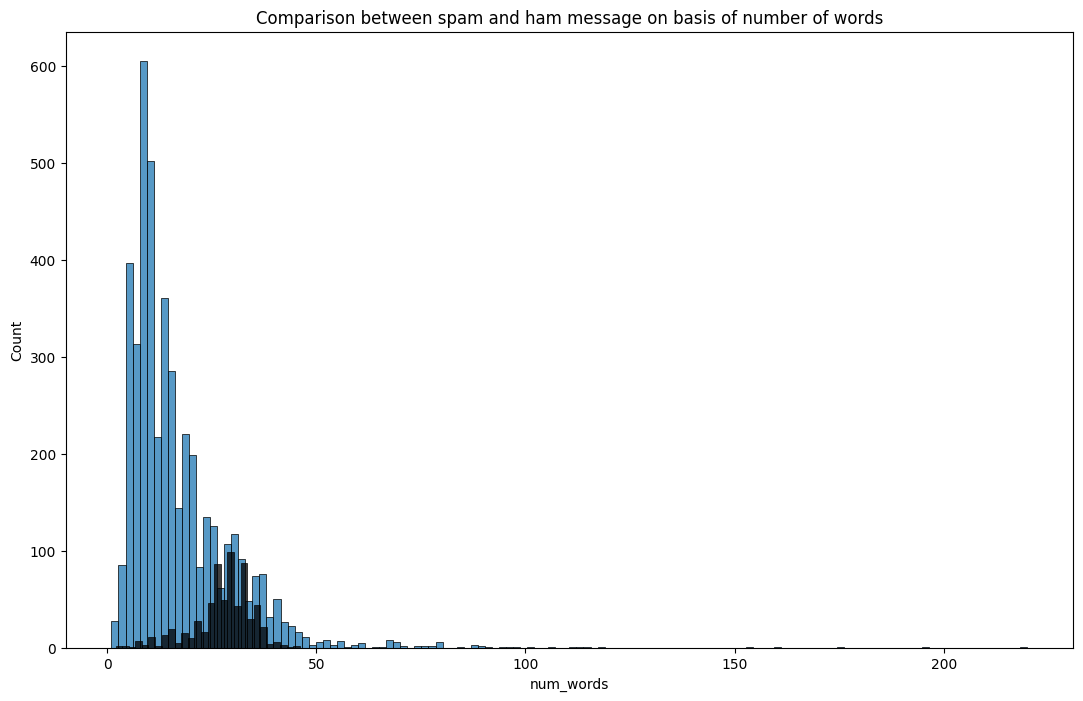

In [105]:
plt.figure(figsize=(13,8))
sns.histplot(data[data['target']==0]['num_words'])
sns.histplot(data[data['target']==1]['num_words'],color='black')
plt.title("Comparison between spam and ham message on basis of number of words")

Text(0.5, 1.0, 'Comparison between spam and ham message on basis of number of sentence')

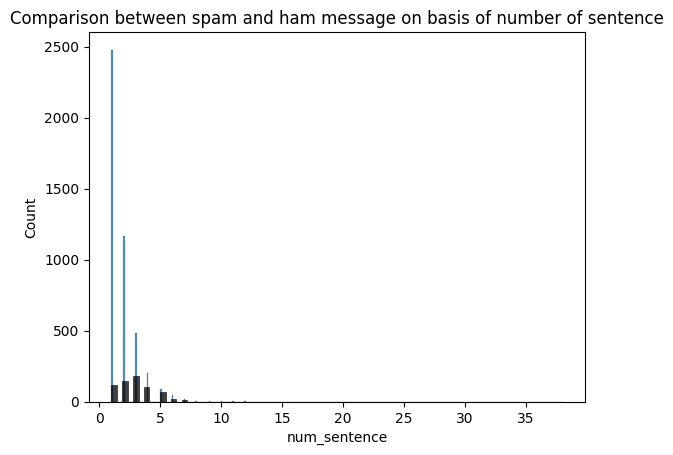

In [106]:

sns.histplot(data[data['target']==0]['num_sentence'])
sns.histplot(data[data['target']==1]['num_sentence'],color='black')
plt.title("Comparison between spam and ham message on basis of number of sentence")

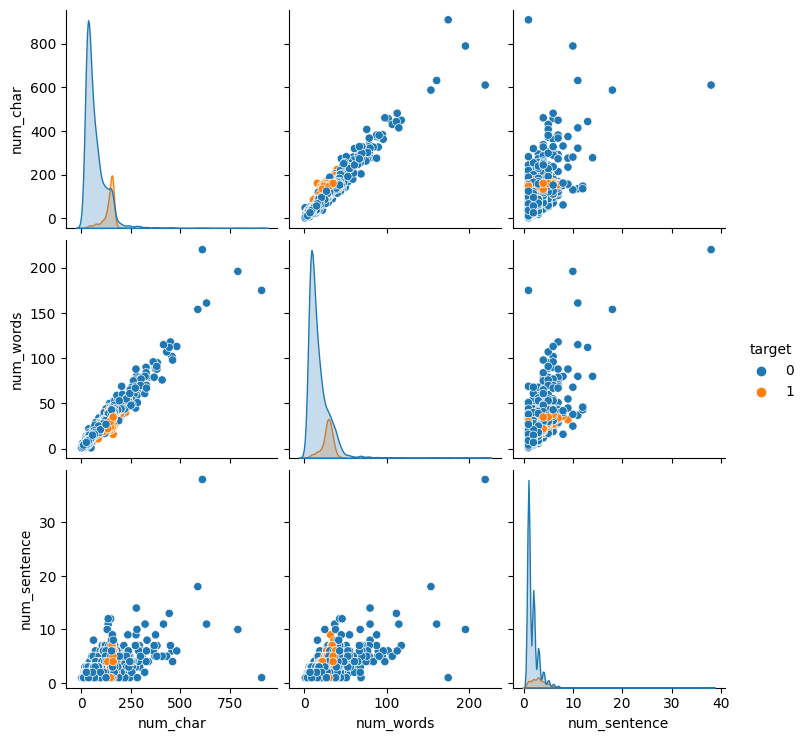

In [107]:
sns.pairplot(data,hue="target")

<ipython-input-108-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

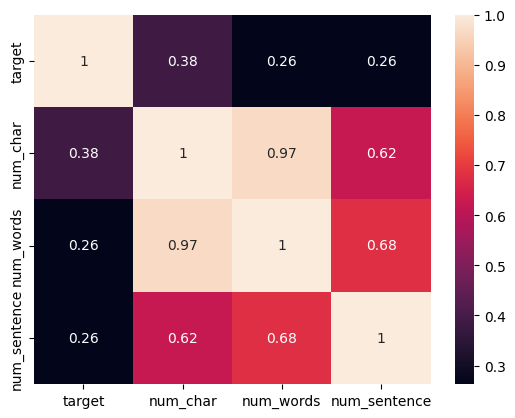

In [108]:
sns.heatmap(data.corr(),annot=True)

**3.Data preprocessing**

In [109]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [110]:
def transf_text(text):
  text=text.lower()
  text= nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:] #cloning
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)


  text=y[:]
  y.clear()

  for i in text:
    y.append(PorterStemmer().stem(i))


  return " ".join(y)

In [111]:
data["transformed_message"]=data.message.apply(transf_text)

In [112]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [113]:
wc_spam=wc.generate(data[data['target']==1]["transformed_message"].str.cat(sep=" "))
wc_ham=wc.generate(data[data['target']==0]["transformed_message"].str.cat(sep=" "))

Text(0.5, 1.0, 'Most common spam words')

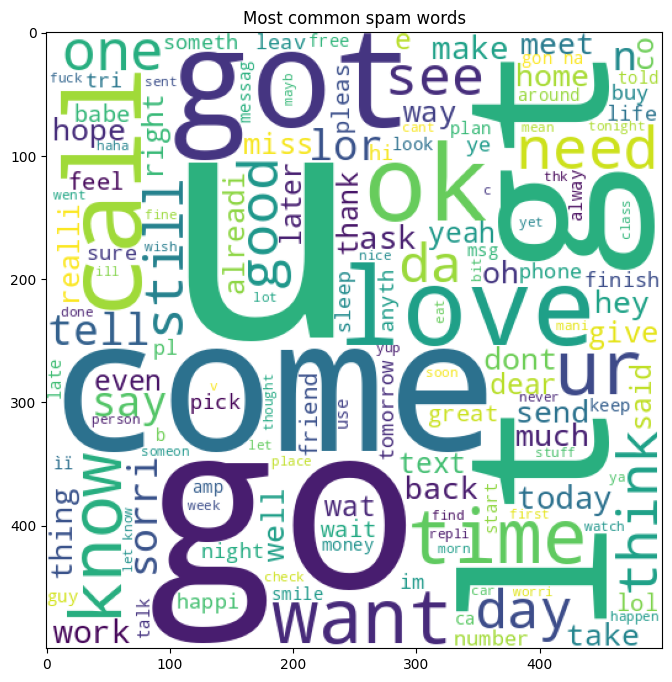

In [114]:
plt.figure(figsize=(15,8))
plt.imshow(wc_spam)
plt.title("Most common spam words")

Text(0.5, 1.0, 'Most common ham words')

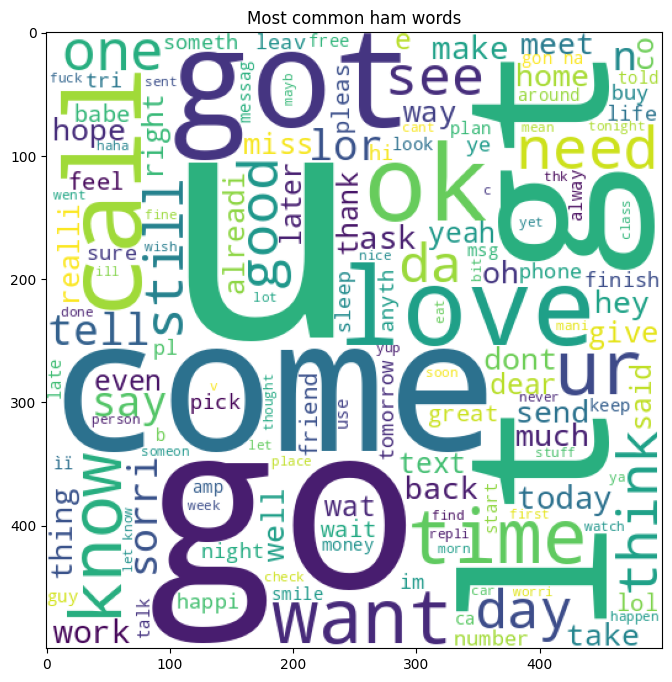

In [115]:
plt.figure(figsize=(15,8))
plt.imshow(wc_ham)
plt.title("Most common ham words")

In [116]:
spam_corpus=[]
for sent in data[data['target']==1]["transformed_message"].tolist():
  for word in sent.split():
    spam_corpus.append(word)


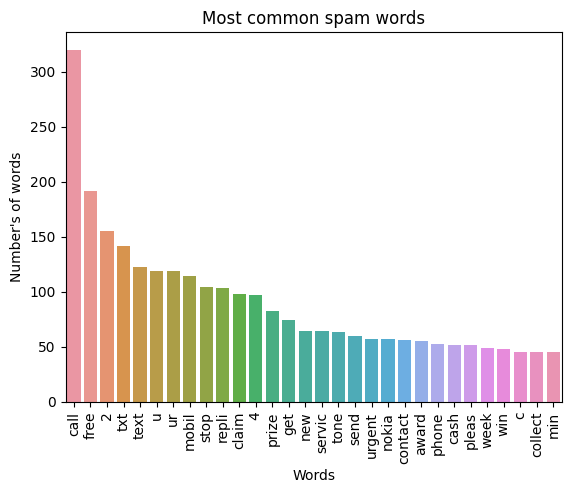

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [117]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1]).set_title("Most common spam words")
plt.ylabel("Number's of words")
plt.xlabel("Words")
plt.xticks(rotation="vertical")
plt.show()
plt.figure(figsize=(10,6))


In [118]:
ham_corpus=[]
for sent in data[data['target']==0]["transformed_message"].tolist():
  for word in sent.split():
    ham_corpus.append(word)

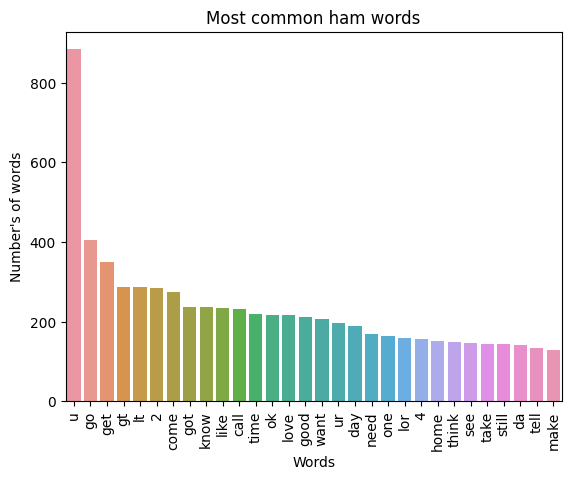

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [119]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1]).set_title("Most common ham words")
plt.ylabel("Number's of words")
plt.xlabel("Words")
plt.xticks(rotation="vertical")
plt.show()
plt.figure(figsize=(10,6))

**4.Model Building**

In [120]:
# vectoring

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tf=TfidfVectorizer(max_features=2000)

In [121]:
x=cv.fit_transform(data["transformed_message"]).toarray()
#x.shape

In [122]:
y=data["target"].values

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [125]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [126]:

gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [127]:
gnb.fit(x_train,y_train)
y_predic=gnb.predict(x_test)
print(accuracy_score(y_predic,y_test))
print(confusion_matrix(y_predic,y_test))
print(precision_score(y_predic,y_test))

0.8800773694390716
[[792  20]
 [104 118]]
0.855072463768116


In [128]:
mnb.fit(x_train,y_train)
y_predic=mnb.predict(x_test)
print(accuracy_score(y_predic,y_test))
print(confusion_matrix(y_predic,y_test))
print(precision_score(y_predic,y_test))

0.9642166344294004
[[871  12]
 [ 25 126]]
0.9130434782608695


In [129]:
bnb.fit(x_train,y_train)
y_predic=bnb.predict(x_test)
print(accuracy_score(y_predic,y_test))
print(confusion_matrix(y_predic,y_test))
print(precision_score(y_predic,y_test))

0.9700193423597679
[[893  28]
 [  3 110]]
0.7971014492753623


In [130]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()


In [131]:
#x=scaler.fit_transform(x)

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [133]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [134]:
Clfs={
    "SVC":svc,
    "KN":knc,
    "NB":mnb,
    "LR":lrc,
    "DT":dtc,
    "RF":rfc,
    "ADBC":abc,
    "BC":bc,
    "ETC":etc,
    "GBC":gbc,
    "Xgc":xgb
}

In [135]:
def train_classifier(clfs,x_train,y_train,x_test,y_test):
  clfs.fit(x_train,y_train)
  y_predic=clfs.predict(x_test)
  return y_predic

In [136]:
accuracy=[]
precision=[]
for clfs in Clfs.values():
  y_predic=train_classifier(clfs,x_train,y_train,x_test,y_test)
  accuracy.append(accuracy_score(y_predic,y_test))
  precision.append(precision_score(y_predic,y_test))


In [137]:
accu_prec=pd.DataFrame(index=Clfs.keys(),data={"Accuracy_score":accuracy,"Precision_score":precision})

In [138]:
accu_prec

,Accuracy_score,Precision_score
SVC,0.926499,0.688406
KN,0.906190,0.297101
NB,0.964217,0.913043
LR,0.970986,0.804348
DT,0.924565,0.478261
RF,0.971954,0.789855
ADBC,0.963250,0.768116
BC,0.962282,0.789855
ETC,0.976789,0.833333
GBC,0.943907,0.615942


In [139]:
# voting classifier
sv=SVC(kernel="sigmoid",gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

In [140]:
from sklearn.ensemble import VotingClassifier

In [141]:
voting=VotingClassifier(estimators=[("svm",sv),('nb',mnb),('et',etc)],voting='soft')

In [142]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [143]:
p=voting.predict(x_test)
print(accuracy_score(p,y_test))
print(precision_score(p,y_test))

0.9816247582205029
0.8840579710144928


**Creating pipeline**

In [239]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import FunctionTransformer

In [253]:

# tranforming transf_text function
#transf_text=FunctionTransformer(func=transf_text())
text_transformer=Pipeline(steps=[("cv",CountVectorizer())])


In [254]:

text_preprocessing=ColumnTransformer(transformers=[("transformed_text",text_transformer,0)])


In [249]:
clf=Pipeline(steps=[("preprocessing",text_prepro),("mnb",MultinomialNB())])

In [228]:
from sklearn.model_selection import train_test_split

In [229]:
a_train,a_test,b_train,b_test=train_test_split(data["transformed_message"],data["target"],test_size=0.2,random_state=2)

In [230]:
clf.fit(a_train,b_train)


IndexError: ignored

In [245]:
a_train.shape

(4135,)

In [246]:
b_train.shape

(4135,)

In [154]:
data["transformed_message"]

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_message, Length: 5169, dtype: object

In [234]:
cv.fit_transform(data["transformed_message"]).toarray()

array([0, 0, 0, ..., 0, 0, 0])

In [250]:
text_preprocessing.fit_transform(data["transformed_message"]).toarray()

IndexError: ignored